In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# ¿Tenemos datos no válidos?

In [2]:
def shape_and_null_values(file):
    print("str(file) shape: " + str(file.shape))
    print("Is null any?")
    print(str(file.isnull().any()))

In [56]:
trips = pd.read_csv('trip.csv', parse_dates=['start_date','end_date'], low_memory=False)
shape_and_null_values(trips)

str(file) shape: (669959, 11)
Is null any?
id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool


In [4]:
stations = pd.read_csv('station.csv')
shape_and_null_values(stations)

str(file) shape: (70, 7)
Is null any?
id                   False
name                 False
lat                  False
long                 False
dock_count           False
city                 False
installation_date    False
dtype: bool


In [5]:
weather = pd.read_csv('weather.csv', parse_dates=['date'])
shape_and_null_values(weather)

str(file) shape: (3665, 24)
Is null any?
date                              False
max_temperature_f                  True
mean_temperature_f                 True
min_temperature_f                  True
max_dew_point_f                    True
mean_dew_point_f                   True
min_dew_point_f                    True
max_humidity                       True
mean_humidity                      True
min_humidity                       True
max_sea_level_pressure_inches      True
mean_sea_level_pressure_inches     True
min_sea_level_pressure_inches      True
max_visibility_miles               True
mean_visibility_miles              True
min_visibility_miles               True
max_wind_Speed_mph                 True
mean_wind_speed_mph                True
max_gust_speed_mph                 True
precipitation_inches               True
cloud_cover                        True
events                             True
wind_dir_degrees                   True
zip_code                          False

In [161]:
iter_status = pd.read_csv('status.csv', iterator = True, chunksize = 100000)
iter_status.get_chunk().sample()

,station_id,bikes_available,docks_available,time
90085,2,18,9,2013/11/02 10:13:01


In [162]:
iter_status.get_chunk().dtypes

station_id          int64
bikes_available     int64
docks_available     int64
time               object
dtype: object

# Cleanup

* Trips

In [57]:
# añadir columna day_of_week y separar la columa star_date y end_date en star_time y end_time con la hora
trips['day_of_week'] = trips['start_date'].dt.dayofweek

trips['start_time'] = trips.start_date.dt.time
trips['start_date'] = trips.start_date.dt.date

trips['end_time'] = trips.end_date.dt.time
trips['end_date'] = trips.end_date.dt.date

trips.sample()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week,start_time,end_time
408189,793056,358,2015-06-03,Market at 10th,67,2015-06-03,Market at 4th,76,289,Subscriber,94303,2,19:43:00,19:49:00


In [58]:
# start_date y end_date quedan de tipo datetime.date...
trips['start_date'] = pd.to_datetime(trips.start_date)
trips['end_date'] = pd.to_datetime(trips.end_date)

In [9]:
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
day_of_week                    int64
start_time                    object
end_time                      object
dtype: object

In [10]:
type(trips.zip_code[0])

str

In [11]:
print(trips[pd.to_numeric(trips.zip_code, errors='coerce').isnull()]['zip_code'])

86        NaN
181       NaN
193       NaN
253       NaN
316       NaN
354       NaN
387       NaN
421       NaN
429       NaN
477       NaN
481       NaN
483       NaN
545       NaN
554       NaN
560       NaN
588       NaN
600       NaN
603       NaN
617       NaN
619       NaN
620       NaN
622       NaN
627       NaN
630       NaN
635       NaN
660       NaN
662       NaN
671       NaN
697       NaN
698       NaN
         ... 
669698    nil
669699    nil
669701    nil
669702    nil
669703    nil
669704    nil
669705    nil
669706    nil
669710    nil
669733    nil
669740    nil
669741    nil
669750    nil
669751    nil
669756    nil
669757    nil
669819    nil
669820    nil
669821    nil
669830    nil
669841    nil
669842    nil
669866    nil
669886    nil
669887    nil
669935    nil
669936    nil
669939    nil
669940    nil
669944    nil
Name: zip_code, dtype: object


In [70]:
# para hacer join con weather es necesario que los zip_code sean int, dejando como NaN los datos no validos
trips.zip_code = pd.to_numeric(trips.zip_code, errors='coerce')
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                     float64
day_of_week                    int64
start_time                    object
end_time                      object
dtype: object

# Hay viajes que comienzan y terminan en la misma estacion? Cuanto duran?

In [13]:
trips.loc[trips.start_station_name == trips.end_station_name,['start_station_name','end_station_name','duration']]\
                .sort_values('duration')

,start_station_name,end_station_name,duration
40000,Clay at Battery,Clay at Battery,60
406816,Steuart at Market,Steuart at Market,60
213972,Powell Street BART,Powell Street BART,60
456799,Embarcadero at Sansome,Embarcadero at Sansome,60
55127,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),60
547555,Golden Gate at Polk,Golden Gate at Polk,60
509279,2nd at Townsend,2nd at Townsend,60
510302,Beale at Market,Beale at Market,60
2925,San Francisco Caltrain 2 (330 Townsend),San Francisco Caltrain 2 (330 Townsend),60
640817,Civic Center BART (7th at Market),Civic Center BART (7th at Market),60


# Son viajes casuales?

In [ ]:
casual_shorts_trips = pd.DataFrame({'count': trips.loc[trips.start_station_name == trips.end_station_name,\
        ['start_station_name','end_station_name','duration']]\
        .groupby(['start_station_name','end_station_name','duration']).size()}).reset_index()
casual_shorts_trips

In [39]:
casual_shorts_trips['count'].max()

7

In [40]:
casual_shorts_trips[casual_shorts_trips['count'] == 7]

,start_station_name,end_station_name,duration,count
8554,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),72,7


In [59]:
# los viajes casuales se repiten entre 1 y 7 veces, en dos años.
# Por lo que no aportan al objetivo de prediccion de la duracion de un viaje y se los elimina del set de datos.

trips = trips.loc[trips.start_station_name != trips.end_station_name,:]

* weather

In [111]:
weather

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107
5,9/3/2013,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,10.0,10.0,24.0,15.0,31.0,0,2.0,NaN,276.0,94107
6,9/4/2013,74.0,68.0,61.0,59.0,57.0,56.0,90.0,72.0,53.0,...,10.0,10.0,29.0,19.0,35.0,0,4.0,NaN,269.0,94107
7,9/5/2013,72.0,66.0,60.0,57.0,56.0,54.0,90.0,74.0,57.0,...,10.0,10.0,31.0,21.0,37.0,0,3.0,NaN,270.0,94107
8,9/6/2013,85.0,71.0,56.0,57.0,51.0,45.0,86.0,58.0,29.0,...,10.0,10.0,24.0,8.0,28.0,0,0.0,NaN,287.0,94107
9,9/7/2013,88.0,73.0,58.0,64.0,54.0,46.0,86.0,59.0,31.0,...,10.0,10.0,21.0,8.0,25.0,0,1.0,NaN,305.0,94107


In [8]:
weather.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                      object
cloud_cover         

In [110]:
print( weather[pd.to_numeric(weather.precipitation_inches, errors='coerce').isnull()]['precipitation_inches'])
# "T" stands for "trace", used when precipitation has been detected, but it isn't sufficient to measure meaningfully.
# sin embargo cuando aparace T en un registro, el atributo event marca NaN y no "rain".(???)

32      T
59      T
75      T
84      T
95      T
131     T
133     T
135     T
153     T
154     T
165     T
170     T
372     T
452     T
479     T
520     T
740     T
755     T
832     T
868     T
905     T
923     T
928     T
929     T
936     T
946     T
952     T
972     T
977     T
988     T
       ..
3240    T
3246    T
3247    T
3272    T
3297    T
3317    T
3325    T
3344    T
3349    T
3372    T
3379    T
3403    T
3411    T
3448    T
3453    T
3454    T
3493    T
3502    T
3524    T
3535    T
3560    T
3563    T
3581    T
3603    T
3605    T
3611    T
3612    T
3621    T
3633    T
3652    T
Name: precipitation_inches, dtype: object


# Cual es la estacion de donde salen mas viajes?

In [8]:
trips['start_station_name'].value_counts()[:5]

San Francisco Caltrain (Townsend at 4th)         49092
San Francisco Caltrain 2 (330 Townsend)          33742
Harry Bridges Plaza (Ferry Building)             32934
Embarcadero at Sansome                           27713
Temporary Transbay Terminal (Howard at Beale)    26089
Name: start_station_name, dtype: int64

# Top 20 recorridos

In [41]:
routes_count = trips.loc[:,['id','start_station_name','end_station_name']]\
        .groupby(['start_station_name','end_station_name']).count()
routes_count.columns = ['trips_count']
routes_count.reset_index().sort_values('trips_count', ascending=False)[:20]

,start_station_name,end_station_name,trips_count
1396,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6216
711,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,6164
1781,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),5041
90,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4839
701,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4357
563,Embarcadero at Sansome,Steuart at Market,4269
521,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3967
1683,Steuart at Market,2nd at Townsend,3903
57,2nd at South Park,Market at Sansome,3627
1340,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),3622


# Los recorridos, duran aproximadamente lo mismo en los dias en donde las condiciones meteorologicas son similares?

# Cuanto dura la mayoria de los viajes?

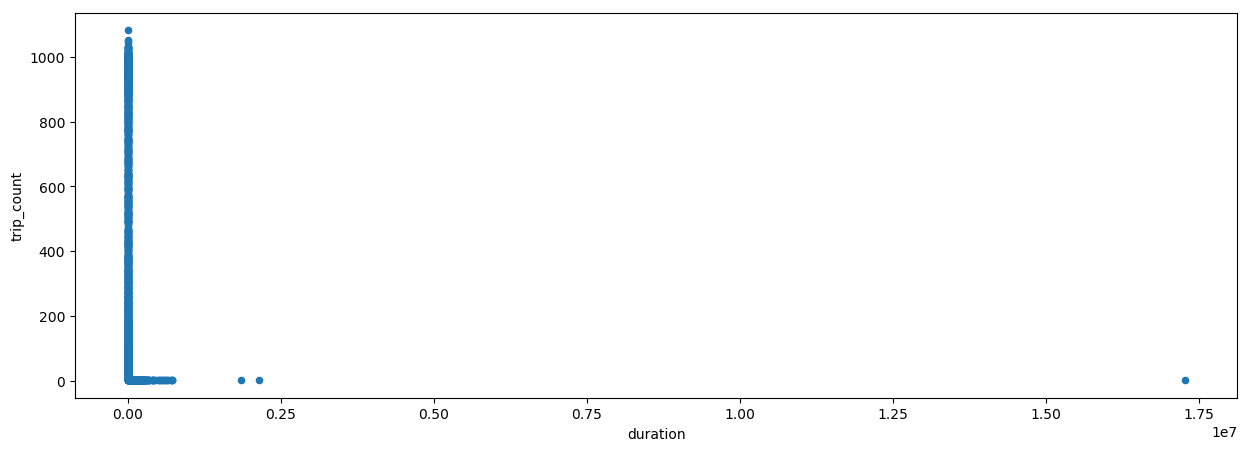

In [113]:
duration_count = trips.loc[:,['duration','id']].groupby('duration').agg('count').reset_index()
duration_count.columns = ['duration','trip_count']
duration_count.plot.scatter('duration','trip_count')

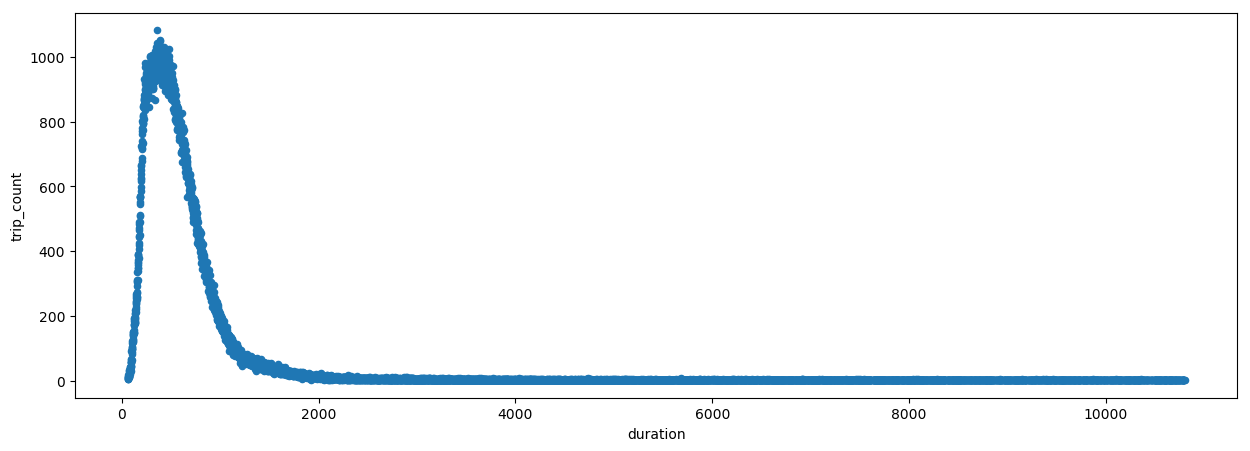

In [44]:
# filtrando los que duran mas de 30 hs (?)
duration_count.loc[duration_count.duration < 10800].plot.scatter('duration','trip_count')

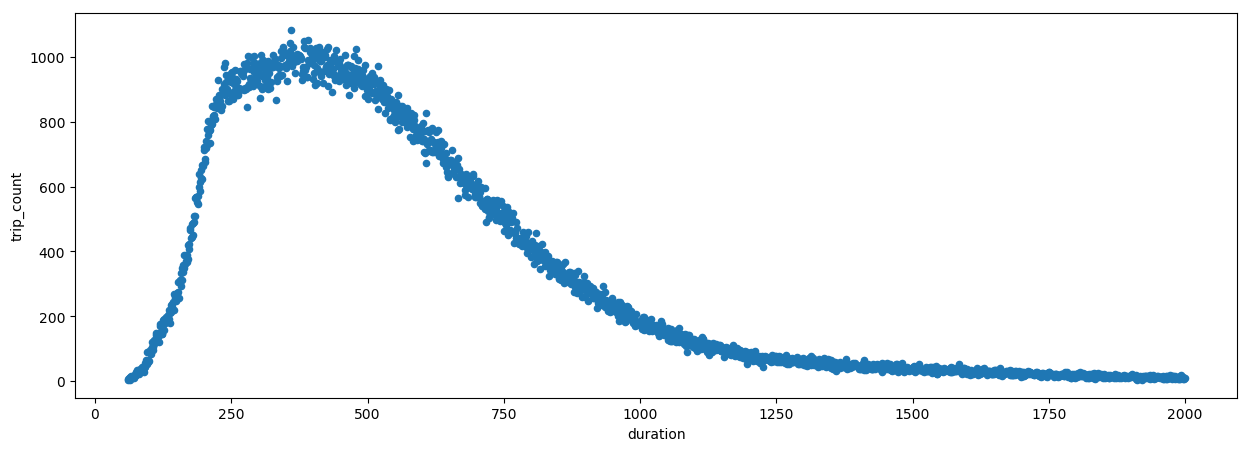

In [111]:
duration_count.loc[duration_count.duration < 2000].plot.scatter('duration','trip_count')

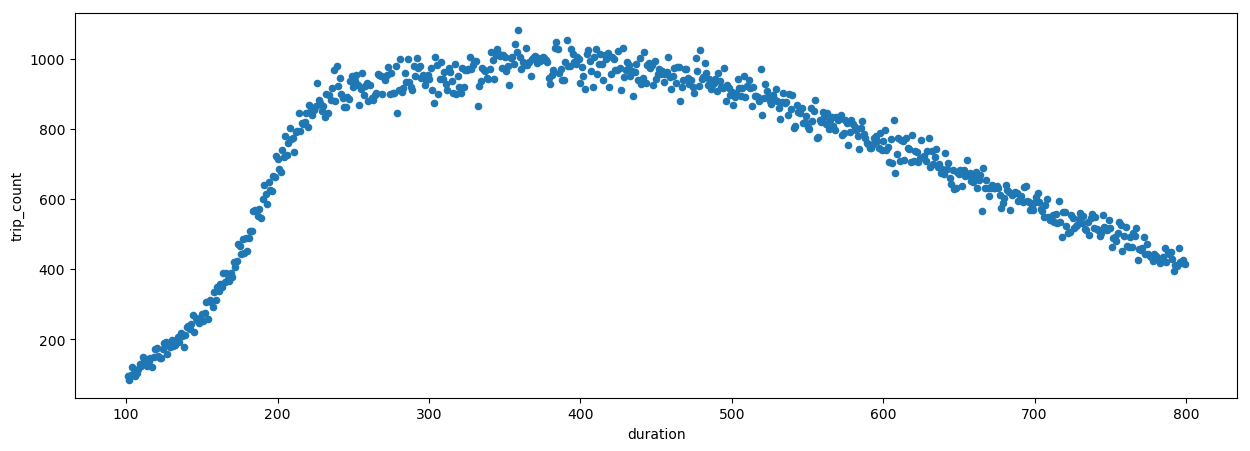

In [110]:
# la mayoria de los viajes duran entre 200 y 600 segundos
duration_count.loc[ ( 100 < duration_count.duration ) & ( duration_count.duration < 800)]\
            .plot.scatter('duration','trip_count')

In [146]:
# hay muy pocos viajes que duran menos de 100. se los elimina??
duration_count.loc[ ( duration_count.duration < 100 )]['trip_count'].sum()

1252

In [148]:
duration_count.loc[ ( duration_count.duration > 20000 )]['trip_count'].sum()

2138

# Como varia la cantidad de viajes segun el dia de la semana?

In [10]:
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
day_of_week                    int64
dtype: object

In [11]:
trips.sample()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week
572499,569961,1905,2014-12-08 15:52:00,Embarcadero at Folsom,51,2014-12-08 16:23:00,Embarcadero at Sansome,60,506,Customer,55960,0


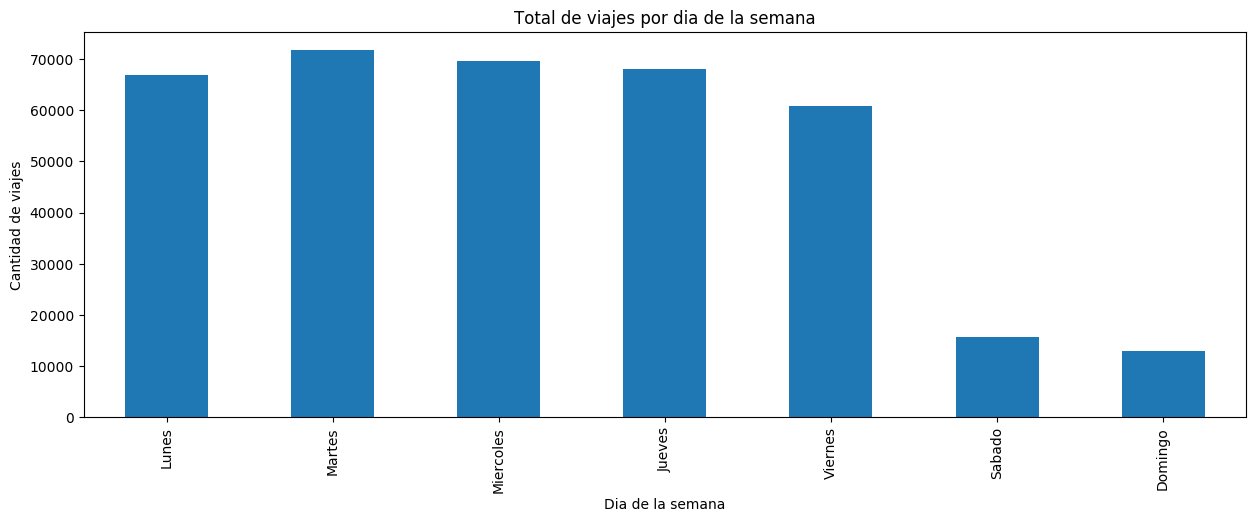

In [52]:
plt.figure()

trips_by_day_count = trips['day_of_week'].value_counts().sort_index()
trips_by_day_count.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
plt.title('Total de viajes por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de viajes')

trips_by_day_count.plot('bar');

## ¿Qué tipos de subscripciones existen?

In [14]:
suscriptors = trips.groupby('subscription_type').agg('count')
suscriptors

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,zip_code,day_of_week
subscription_type,,,,,,,,,,,
Customer,103213,103213,103213,103213,103213,103213,103213,103213,103213,96594,103213
Subscriber,566746,566746,566746,566746,566746,566746,566746,566746,566746,566746,566746


# Los "Customers" tienden a estar mas los fines de semana?

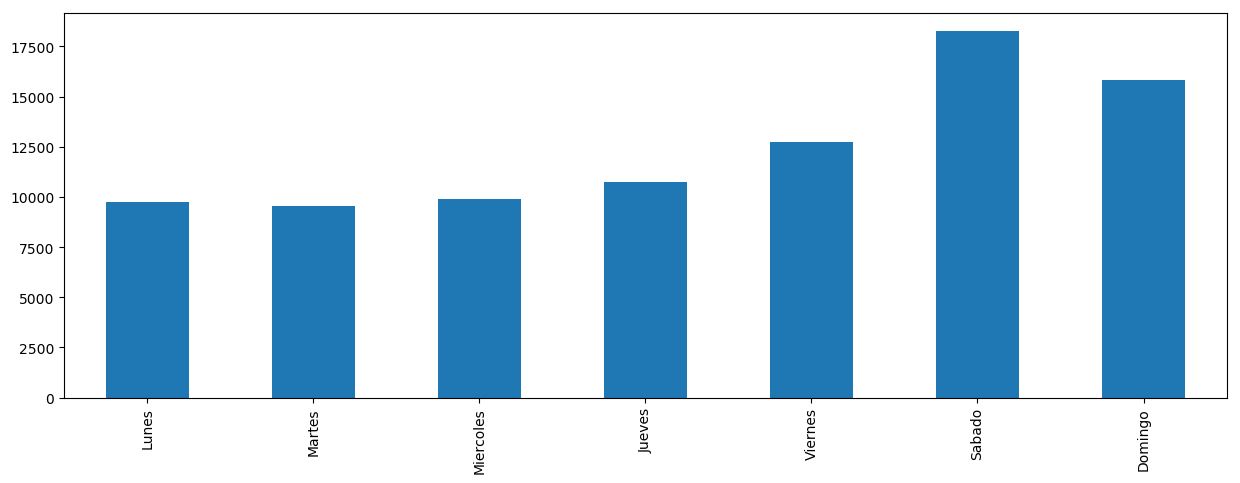

In [156]:
customers_trips_by_day = trips.loc[trips['subscription_type'] == 'Customer',['day_of_week']]['day_of_week'].value_counts().sort_index()
customers_trips_by_day.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
customers_trips_by_day.plot('bar')


# Mean Duration Customers vs. Mean Duration Subscribers

In [155]:
duration_trip_by_subscription = pd.DataFrame({'mean_duration': trips.groupby(['subscription_type'])['duration'].mean(),\
                                'std_duration': trips.groupby(['subscription_type'])['duration'].std()})

duration_trip_by_subscription

,mean_duration,std_duration
subscription_type,,
Customer,3068.506673,60301.122328
Subscriber,578.621570,3368.785983


# En promedio, la duracion de los viajes en la semana es constante? Las personas van al trabajo en bicicleta?

In [54]:
def getNames(seriesOfNumbers):
    names = []
    days = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
    
    for numDay in seriesOfNumbers:
        names.append(days[numDay])
    return names

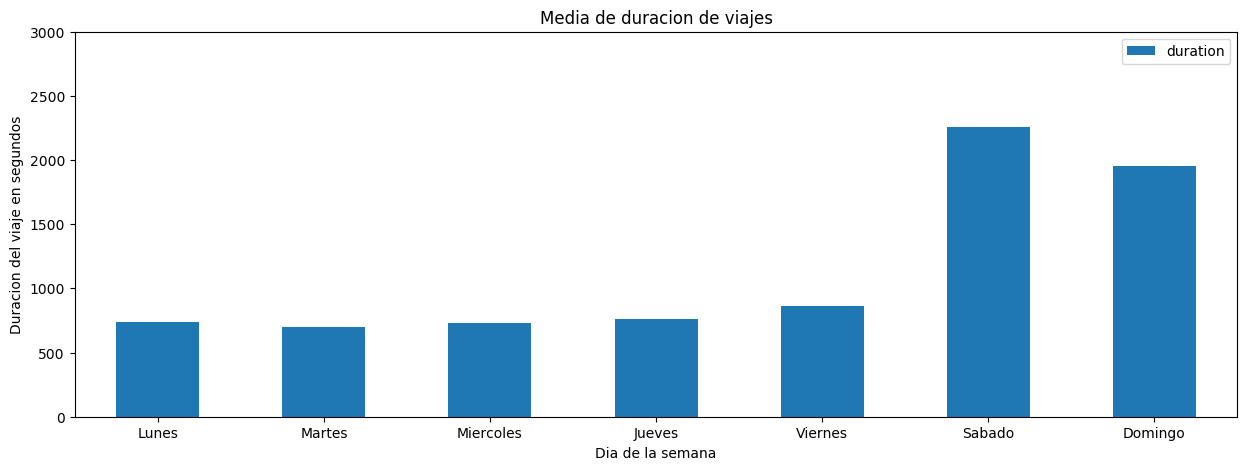

In [78]:
tripsByDayAndDuration = trips.loc[:,['day_of_week','duration']].sort_values('day_of_week')
tripsByDayAndDuration = tripsByDayAndDuration.groupby('day_of_week').mean().reset_index()
tripsByDayAndDuration['day_of_week'] = tripsByDayAndDuration[['day_of_week']].apply(lambda dates: getNames(dates))
tripsByDayAndDuration.plot.bar('day_of_week','duration',ylim=(0,3000), rot=0)
plt.title('Media de duracion de viajes')
plt.xlabel('Dia de la semana')
plt.ylabel('Duracion del viaje en segundos')

In [ ]:
# en la semana la duracion deberia ser constante, si se concidera que las personas van al trabajo/colegio en bicicleta
# si se filtran los "costumers" dejando los suscriptos...

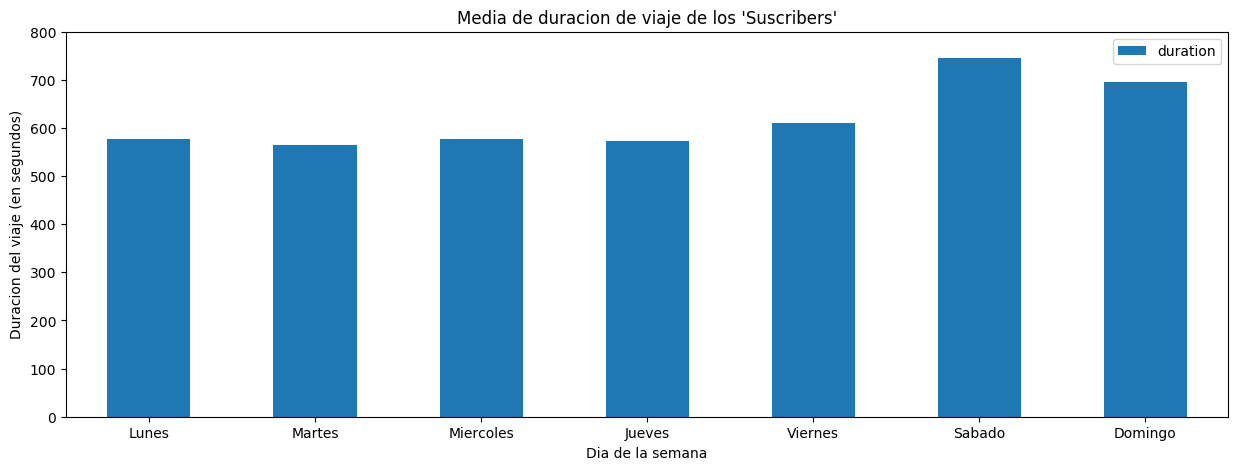

In [242]:
subscriptors_trips = trips.loc[trips.subscription_type == 'Subscriber',['day_of_week','duration']]
subscriptors_trips = subscriptors_trips.groupby('day_of_week').mean().reset_index()
subscriptors_trips['day_of_week'] = subscriptors_trips[['day_of_week']].apply(lambda dates: getNames(dates))
subscriptors_trips.plot.bar('day_of_week','duration',ylim=(0,800), rot=0)
plt.title('Media de duracion de viaje de los \'Suscribers\'')
plt.xlabel('Dia de la semana')
plt.ylabel('Duracion del viaje (en segundos)')

# Como es la variabilidad de la duracion de los viajes en la semana?

# Como varían los viajes en función de la hora?

In [87]:
trips['start_hour'] = trips.start_time.apply(lambda x: x.hour)

In [88]:
trips.shape

(645978, 16)

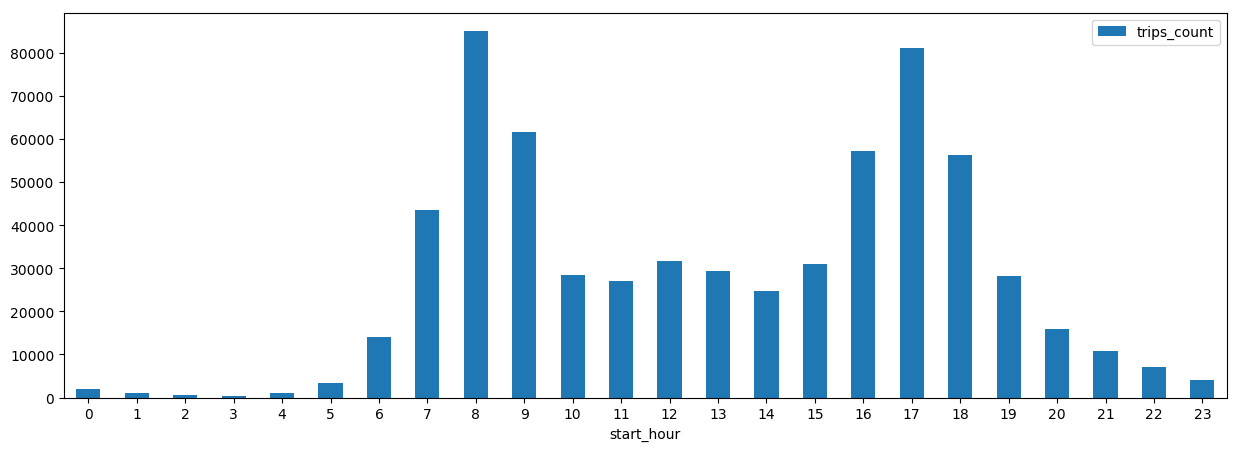

In [89]:
trips_by_hour = trips.loc[:,['start_hour','id']].groupby('start_hour').count()
trips_by_hour.columns = ['trips_count']
trips_by_hour.plot(kind='bar',rot=0);

# Como varía la duracion promedio de los viajes en función de la hora?

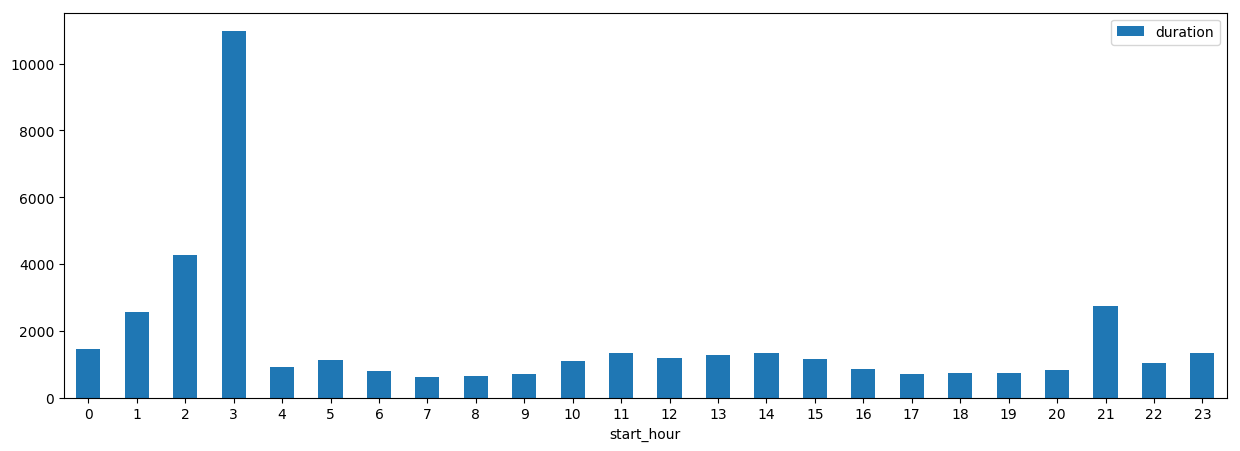

In [90]:
duration_by_hour = trips.loc[:,['start_hour','duration']].groupby('start_hour').mean()
duration_by_hour.plot(kind='bar',rot=0);

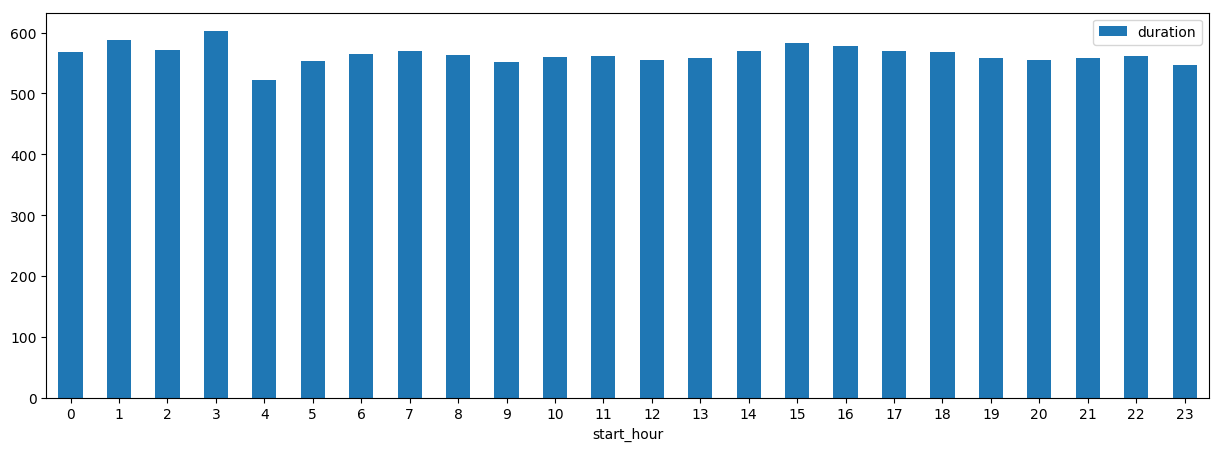

In [150]:
# filtrando por el rango en el que esta la mayoria de los viajes
is_in_range = (trips.duration > 300) & (trips.duration < 1000)
duration_by_hour = trips.loc[is_in_range ,['start_hour','duration']].groupby('start_hour').mean()
duration_by_hour.plot(kind='bar', rot=0)

# Como varia la duracion promedio de los viajes en funcion del mes?

In [81]:
trips['month'] = trips.start_date.apply(lambda x: x.month)

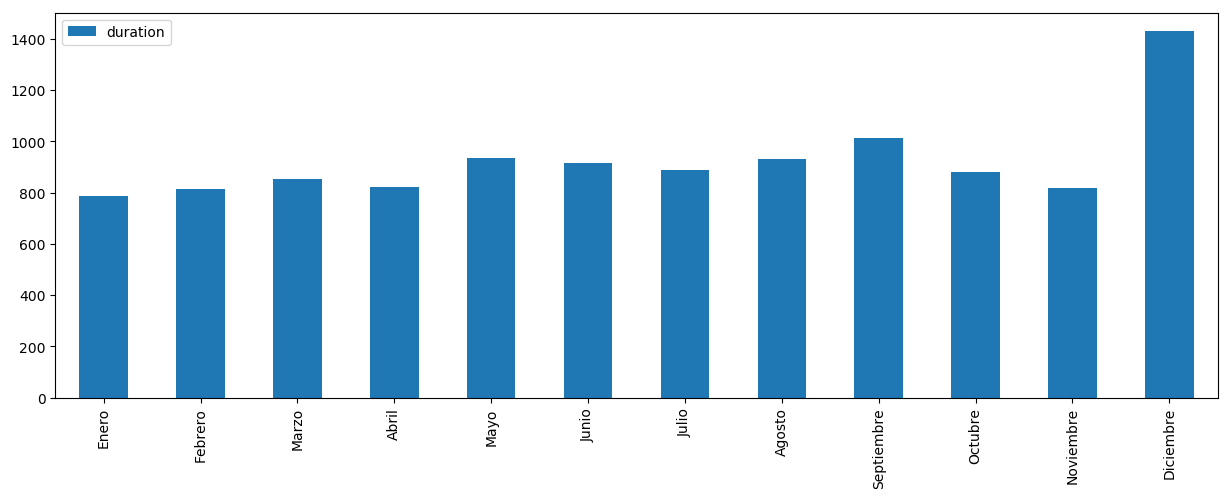

In [82]:
trips_by_month = trips.loc[:,['month','duration']].groupby('month').mean()
trips_by_month.index = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
trips_by_month.plot(kind='bar');

#  Afecta la temperatura a la duracion de los viajes?